# PCA
untuk mereduksi dimensi data, terutama ketika data kita memiliki multicolinearity yang tinggi. 
https://towardsdatascience.com/the-mathematics-behind-principal-component-analysis-fff2d7f4b643  
https://www.sartorius.com/en/knowledge/science-snippets/what-is-principal-component-analysis-pca-and-how-it-is-used-507186  
https://builtin.com/data-science/step-step-explanation-principal-component-analysis  
https://towardsdatascience.com/principal-component-analysis-for-dimensionality-reduction-115a3d157bad

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


## Data

In [2]:
cancer=load_breast_cancer()

In [4]:
# cancer

In [6]:
pd.set_option('display.max_columns',None)
pd.DataFrame(cancer.data,columns=cancer.feature_names)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


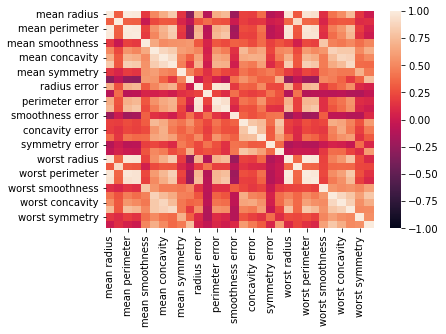

In [8]:
sns.heatmap(pd.DataFrame(cancer.data,columns=cancer.feature_names).corr(),vmax=1,vmin=-1)

Korelasi antar feature cukup tinggi

## Scaling

In [9]:
scaler= StandardScaler()
x_scaled=scaler.fit_transform(cancer.data)

In [10]:
x_scaled.shape

(569, 30)

## PCA

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca=PCA(n_components=30) #numbers of components to keep
pca.fit(x_scaled)

#transform
x_pca=pca.transform(x_scaled)

In [22]:
x_pca

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
        -3.39144536e-02,  4.56477199e-02, -4.71692081e-02],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
         3.26241827e-02, -5.68742432e-03, -1.86787626e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
         4.70258247e-02,  3.14589659e-03,  7.50534755e-04],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
        -2.57775589e-03,  6.70621179e-03,  3.77041667e-03],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
        -6.80863833e-02, -8.41632764e-02, -2.37828222e-02],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
        -9.51587894e-03, -6.09131090e-02, -1.94755854e-02]])

In [23]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

berapa % informasi yang tersimpan dalam masing-masing komponen?

In [13]:
variance=[]

for i in range(30):
    variance.append(np.var(x_pca[:,i])) #variance dari masing2 kolom

In [15]:
# variance

In [19]:
# informasi yang tersimpan di tiap komponen diwakili oleh
# nilai varians dari komponen tersebut dibagi dengan nilai varians total dari semua komponensum()

variance[0]/sum(variance)*100 # % informasi yang tersimpan di komponen pertama

44.27202560752635

In [21]:
print('informasi yang tersimpan pada 2 komponen pertama adalah', round(sum(variance[:2])/sum(variance)*100,2), '%')

informasi yang tersimpan pada 2 komponen pertama adalah 63.24 %


## Reducing Dimension from 30 to 2

In [26]:
pd.DataFrame(x_pca[:,:2]) #bisa begini

,0,1
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


In [27]:
pca=PCA(n_components=2)
pca.fit(x_scaled)
x_pca=pca.transform(x_scaled)

In [28]:
x_pca.shape #2 kolom

(569, 2)

## Scatter plot from PCA result

In [30]:
# cancer.target

In [34]:
pca_result=pd.DataFrame(x_pca, columns=['First Component', 'Second Component'])

In [35]:
pca_result['Label']=np.where(cancer.target,'malignant','benign')

In [36]:
pca_result.head()

,First Component,Second Component,Label
0,9.192837,1.948583,benign
1,2.387802,-3.768172,benign
2,5.733896,-1.075174,benign
3,7.122953,10.275589,benign
4,3.935302,-1.948072,benign


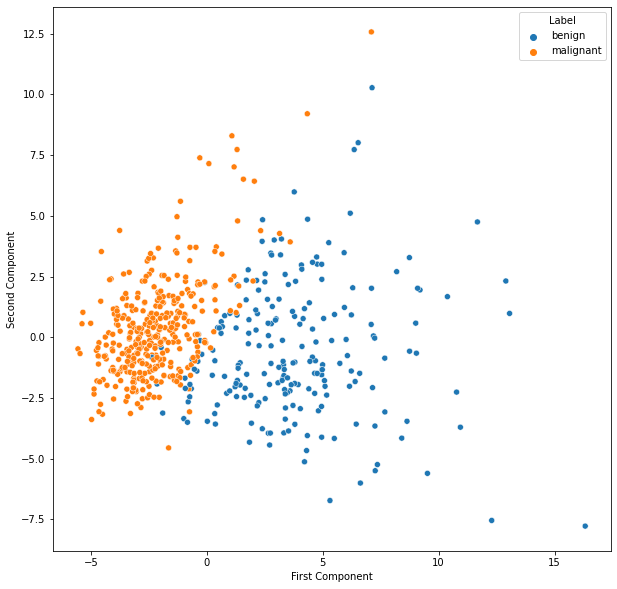

In [37]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='First Component', y='Second Component', data=pca_result, hue= 'Label')


* Setelah dilakukan PCA dan mengambil 2 komponen, informasi yang tersimpan pada kedua komponen adalah 63,24%
* dimensi dari data cancer direduksi dari 30 menjadi 2, dan informasi yang hilang sebesar 36.76%, tapi dapat dilihat bahwa kedua komponen dapat memisahkan tumor ganas dan jinak dengan baik
* dengan PCA, kita bisa melihat bahwa data cancer benign lebih tersebar dibanding data cancer malignant

## Classification: Cancer Data

### Without PCA

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

In [39]:
x=pd.DataFrame(cancer.data, columns=cancer.feature_names)
y=cancer.target

In [40]:
x_train, x_test, y_train, y_test= train_test_split(x,y, stratify=y, random_state=2020, test_size=0.2)

In [41]:
knn= KNeighborsClassifier()
estimator=Pipeline([
    ('preprocess', StandardScaler()),
    ('model', knn)
])

In [43]:
estimator.fit(x_train,y_train)
y_pred= estimator.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        42
           1       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### With PCA

In [44]:
estimator=Pipeline([
    ('preprocess', StandardScaler()),
    ('PCA', PCA(n_components=2)),
    ('model',KNeighborsClassifier())
])

In [45]:
estimator.fit(x_train,y_train)
y_pred=estimator.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        42
           1       0.95      0.96      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



* performa model antara dengan dan tanpa PCA tidak berbeda jauh.

# Clustering: KMeans

In [54]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [55]:
# generate data dummy
x,y= make_blobs(random_state=42)

C:\Users\brigi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


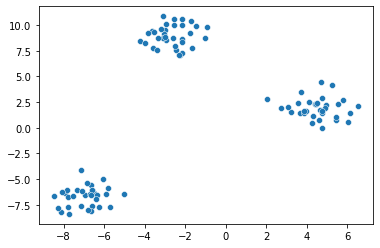

In [56]:
# scatter plot
sns.scatterplot(x[:,0],x[:,1])

In [57]:
# fit Kmeans
kmeans=KMeans(n_clusters=3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [58]:
kmeans.labels_

array([1, 2, 0, 2, 1, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0, 2, 2, 1, 0, 2, 0,
       0, 2, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 0, 1, 2, 1, 2, 1, 1,
       2, 1, 2, 2, 2, 1, 1, 0, 2, 1, 2, 1, 2, 2, 0, 2, 0, 1, 0, 0, 0, 2,
       0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 1, 0])

In [59]:
kmeans.cluster_centers_

array([[-2.66780392,  8.93576069],
       [-6.95170962, -6.67621669],
       [ 4.49951001,  1.93892013]])

C:\Users\brigi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


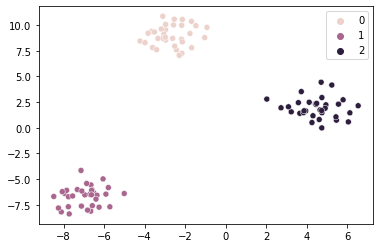

In [60]:
sns.scatterplot(x[:,0],x[:,1], hue=kmeans.labels_)

# Analysing with KMeans

In [61]:
df= pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [63]:
df=df.rename(columns={
    'Annual Income (k$)':'Annual Income',
    'Spending Score (1-100)':'Spending Score'
})

In [64]:
x=df.loc[:,['Annual Income', 'Spending Score']]

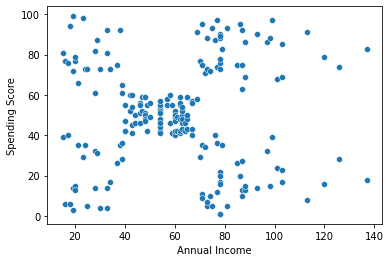

In [67]:
sns.scatterplot(x='Annual Income', y='Spending Score', data=x)

## Finding best K: Elbow Method

In [71]:
k= range(1,10)
inertia=[]

for i in k:
    model= KMeans(n_clusters=i)
    model.fit(x)
    inertia.append(model.inertia_)
    

C:\Users\brigi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


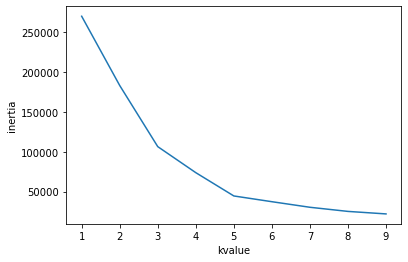

In [73]:
plt.plot(k,inertia)
plt.xlabel('kvalue')
plt.ylabel('inertia')
plt.show()

jumlah cluster yang optimum 3 atau 5?

## Finding best K: Silhouette Method

In [75]:
from sklearn.metrics import silhouette_score

In [77]:
score=[]
k_num=range(2,10)
best=0

for i in k_num:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    labels=kmeans.labels_
    sil_score=(silhouette_score(x,labels,metric='euclidean'))
    score.append(sil_score)
    
    if best<sil_score:
        best=sil_score
        best_k=i

C:\Users\brigi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\brigi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Silhlouette Score')

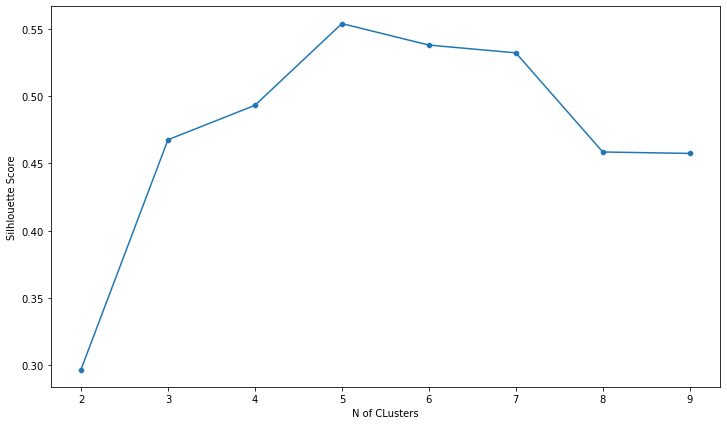

In [78]:
plt.figure(figsize=(12,7))
sns.lineplot(k_num,score)
sns.scatterplot(k_num,score)
plt.xticks(k_num)
plt.xlabel('N of CLusters')
plt.ylabel('Silhlouette Score')

In [80]:
print('Jumlah cluster optimum adalah',best_k,'dengan silhouette score', best)

Jumlah cluster optimum adalah 5 dengan silhouette score 0.553931997444648


## Final Clustering

In [89]:
kmeans= KMeans(n_clusters=best_k, random_state=2020)
kmeans.fit(x)

KMeans(n_clusters=5, random_state=2020)

In [90]:
x['cluster']=kmeans.labels_

In [91]:
x.head()

,Annual Income,Spending Score,cluster
0,15,39,3
1,15,81,1
2,16,6,3
3,16,77,1
4,17,40,3


### Analysis for Each Cluster

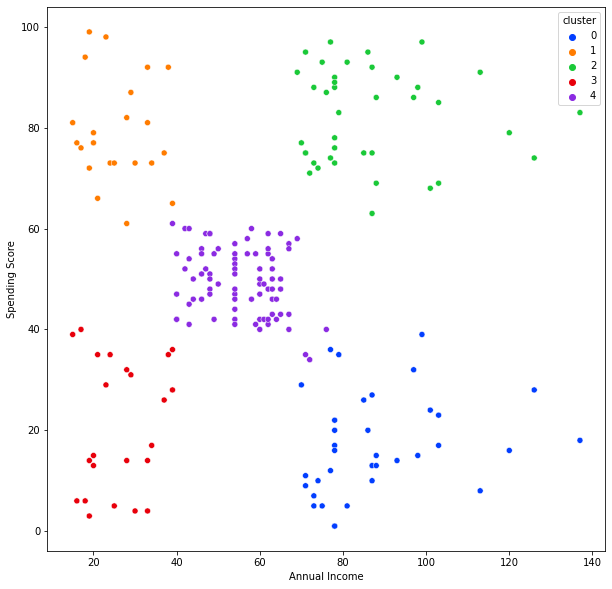

In [92]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Annual Income', y='Spending Score', hue='cluster', data=x, palette='bright')

In [93]:
x.groupby('cluster').mean()

,Annual Income,Spending Score
cluster,,
0,88.200000,17.114286
1,25.727273,79.363636
2,86.538462,82.128205
3,26.304348,20.913043
4,55.296296,49.518519


* Cluster 0: high income, low spending 
* Cluster 1: low income, high spending
* Cluster 2: high income, high spending
* cluster 3: low income, low spending
* cluster 4: middle income, middle spending

# latihan

Gunakan data ['Gender','Age','Annual Income', 'Spending Score'] dari data Mall_Customers.csv.

* Lakukan PCA dari data tersebut, ambil 2 komponen pertama untuk melihat pattern dari data kita.
    * jangan lupa encode data gender
    * putuskan apakah kalian perlu memakai scaling atau tidak
    * Berapa % informasi yang tersimpan di 2 komponen pertama?
* Lakukan clustering dengan Kmeans menggunakan 2 komponen yang kalian pilih
    * Tentukan jumlah cluster yang optimum
    * analisis karakteristik masing-masing cluster yang terbentuk.

In [101]:
x=df.loc[:,['Gender','Age','Annual Income', 'Spending Score']]

In [98]:
x

,Gender,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [100]:
x['Gender']=np.where(x['Gender']=='Male',1,0)

In [107]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [120]:
transformer= ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'),['Gender']),
    ('scaling', StandardScaler(),['Age','Annual Income', 'Spending Score'])
])

In [121]:
x_transformed= transformer.fit_transform(x)

In [122]:
pca= PCA()
x_pca=pca.fit_transform(x_transformed)

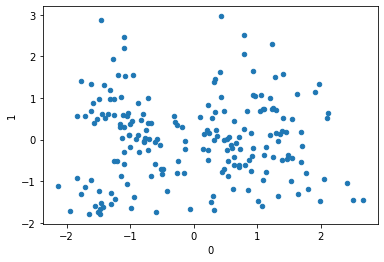

In [123]:
pd.DataFrame(x_pca[:,:2]).plot.scatter(x=0,y=1)

In [125]:
x['Male']=np.where(x['Gender']=='Male',1,0)

In [126]:
pca= PCA()
x_pca2=pca.fit_transform(x.drop(columns='Gender'))

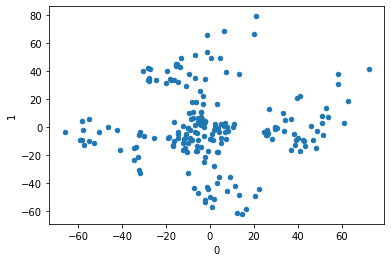

In [127]:
pd.DataFrame(x_pca2[:,:2]).plot.scatter(x=0,y=1)

In [130]:
variance=[]

for i in range(4):
    variance.append(np.var(x_pca2[:,i])) 

In [153]:
variance

[696.7631101517211, 680.9101821328455, 166.39273663007572, 0.2442710853599371]

In [131]:
print('informasi yang tersimpan pada 2 komponen pertama adalah', round(sum(variance[:2])/sum(variance)*100,2), '%')

informasi yang tersimpan pada 2 komponen pertama adalah 89.21 %


## clustering

In [155]:
k= range(1,10)
inertia=[]

for i in k:
    model= KMeans(n_clusters=i)
    model.fit(x_pca2[:,:2])
    inertia.append(model.inertia_)

C:\Users\brigi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


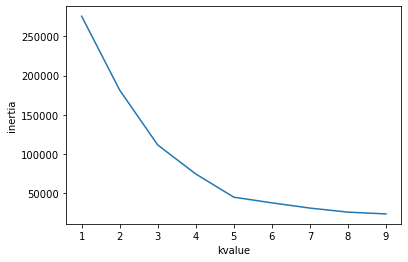

In [156]:
plt.plot(k,inertia)
plt.xlabel('kvalue')
plt.ylabel('inertia')
plt.show()

In [163]:
score=[]
k_num=range(2,10)
best=0

for i in k_num:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x_pca2[:,:2])
    labels=kmeans.labels_
    sil_score=(silhouette_score(x_pca2[:,:2],labels,metric='euclidean'))
    score.append(sil_score)
    
    if best<sil_score:
        best=sil_score
        best_k=i

C:\Users\brigi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\brigi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Silhlouette Score')

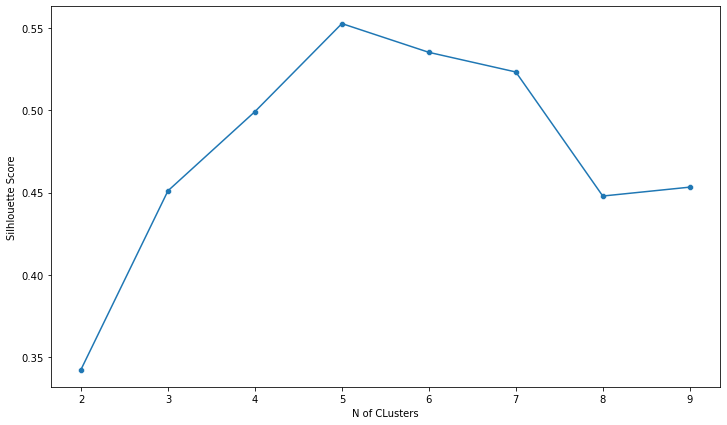

In [164]:
plt.figure(figsize=(12,7))
sns.lineplot(k_num,score)
sns.scatterplot(k_num,score)
plt.xticks(k_num)
plt.xlabel('N of CLusters')
plt.ylabel('Silhlouette Score')

In [165]:
print('Jumlah cluster optimum adalah',best_k,'dengan silhouette score', best)

Jumlah cluster optimum adalah 5 dengan silhouette score 0.5526264331833407


In [168]:
kmeans= KMeans(n_clusters=best_k, random_state=2020)
kmeans.fit(x_pca2[:,:2])

KMeans(n_clusters=5, random_state=2020)

In [169]:
df_pca=pd.DataFrame(x_pca2[:,:2])

In [170]:
df_pca['cluster']=kmeans.labels_

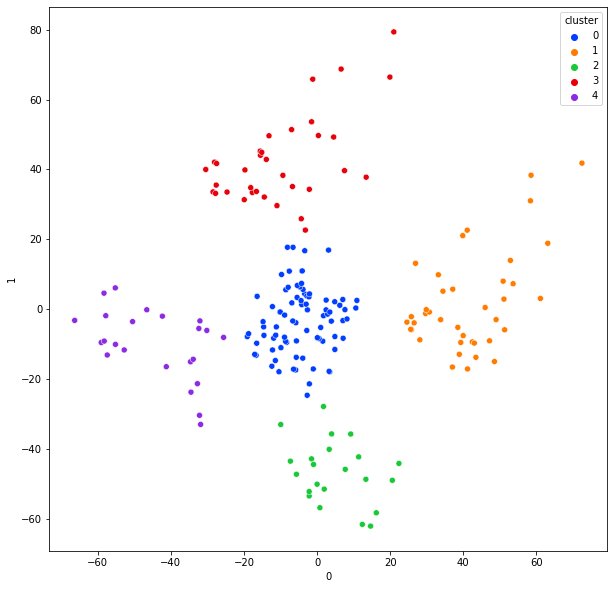

In [171]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=0, y=1, hue='cluster', data=df_pca, palette='bright')

In [172]:
x['cluster']=kmeans.labels_

In [173]:
x.groupby('cluster').mean()

,Age,Annual Income,Spending Score,Male
cluster,,,,
0,42.475610,55.475610,49.268293,0.402439
1,32.692308,86.538462,82.128205,0.461538
2,25.272727,25.727273,79.363636,0.409091
3,41.647059,88.735294,16.764706,0.558824
4,45.217391,26.304348,20.913043,0.391304


In [174]:
x[x['cluster']==0].describe()

,Age,Annual Income,Spending Score,Male,cluster
count,82.000000,82.000000,82.000000,82.000000,82.0
mean,42.475610,55.475610,49.268293,0.402439,0.0
std,16.490346,9.078839,6.874625,0.493407,0.0
min,18.000000,39.000000,29.000000,0.000000,0.0
25%,27.000000,48.000000,43.250000,0.000000,0.0
50%,45.500000,55.500000,49.500000,0.000000,0.0
75%,54.000000,62.750000,55.000000,1.000000,0.0
max,70.000000,76.000000,61.000000,1.000000,0.0


## clustering 2
dengan data awal tanpa pca, tapi visualisasi dengan komponen hasil pca

In [177]:
x2= x.drop(columns=["Gender",'cluster'])
x2

,Age,Annual Income,Spending Score,Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [178]:
k= range(1,10)
inertia=[]

for i in k:
    model= KMeans(n_clusters=i)
    model.fit(x2)
    inertia.append(model.inertia_)

C:\Users\brigi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


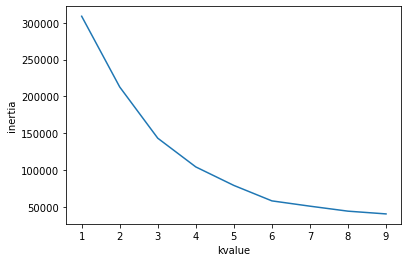

In [179]:
plt.plot(k,inertia)
plt.xlabel('kvalue')
plt.ylabel('inertia')
plt.show()

In [180]:
score=[]
k_num=range(2,10)
best=0

for i in k_num:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x2)
    labels=kmeans.labels_
    sil_score=(silhouette_score(x2,labels,metric='euclidean'))
    score.append(sil_score)
    
    if best<sil_score:
        best=sil_score
        best_k=i

C:\Users\brigi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\brigi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Silhlouette Score')

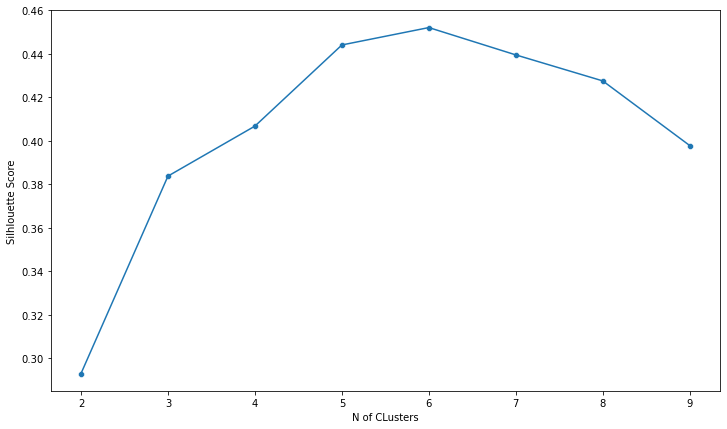

In [181]:
plt.figure(figsize=(12,7))
sns.lineplot(k_num,score)
sns.scatterplot(k_num,score)
plt.xticks(k_num)
plt.xlabel('N of CLusters')
plt.ylabel('Silhlouette Score')

In [189]:
print('Jumlah cluster optimum adalah',best_k,'dengan silhouette score', best)

Jumlah cluster optimum adalah 6 dengan silhouette score 0.45205475380756527


In [186]:
kmeans= KMeans(n_clusters=best_k, random_state=2020)
kmeans.fit(x2)

KMeans(n_clusters=6, random_state=2020)

In [187]:
df_pca2=pd.DataFrame(x_pca2[:,:2])
df_pca2['cluster']=kmeans.labels_

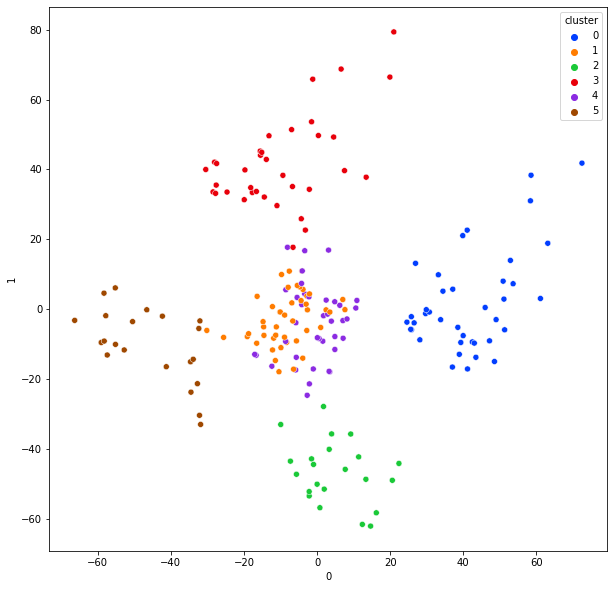

In [190]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=0, y=1, hue='cluster', data=df_pca2, palette='bright')

In [192]:
x2['cluster']=kmeans.labels_

In [193]:
x2.groupby('cluster').mean()

,Age,Annual Income,Spending Score,Male
cluster,,,,
0,32.692308,86.538462,82.128205,0.461538
1,56.155556,53.377778,49.088889,0.444444
2,25.272727,25.727273,79.363636,0.409091
3,41.685714,88.228571,17.285714,0.571429
4,27.000000,56.657895,49.131579,0.342105
5,44.142857,25.142857,19.523810,0.380952
